<a href="https://colab.research.google.com/github/STYLO009/ANN_projects/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0


In [4]:
df.value_counts()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED   INTUBED  PNEUMONIA  AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU 
2      4             1    1             9999-99-99  97       2          35   2         2         2     2       2        2             2              2               2        2.0            2.0      3.0                   97.0    333
                                                                        33   2         2         2     2       2        2             2              2               2        2.0            2.0      3.0                   97.0    329
                     2    1             9999-99-99  97       2          31   97        2         2     2       2        2             2              2               2        2.0            2.0      3.0                   97.0    286
                     1    1             9999-99-99  97       2          37   2         2         2     2       2        2             2              2               2        2.0            2.0      3.0                   97.0    285
                                                                        30   2         2         2     2       2        2             2              2               2        2.0            2.0      3.0                   97.0    280
                                                                                                                                                                                                                                   ... 
1      4             2    2             14/05/2020  1        2          59   97        2         2     2       2        2             2              2               2        2.0            1.0      6.0                   2.0       1
                                                                        57   97        1         2     2       2        1             2              2               2        2.0            2.0      6.0                   2.0       1
                                                                        55   97        2         2     2       2        2             2              2               2        2.0            2.0      3.0                   2.0       1
                                                                        53   97        2         2     2       2        2             2              2               2        2.0            2.0      3.0                   2.0       1
                                                             1          53   97        2         2     2       2        1             2              2               2        2.0            2.0      3.0                   1.0       1
Name: count, Length: 61020, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115228 entries, 0 to 115227
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 115228 non-null  int64  
 1   MEDICAL_UNIT          115228 non-null  int64  
 2   SEX                   115228 non-null  int64  
 3   PATIENT_TYPE          115228 non-null  int64  
 4   DATE_DIED             115228 non-null  object 
 5   INTUBED               115228 non-null  int64  
 6   PNEUMONIA             115228 non-null  int64  
 7   AGE                   115228 non-null  int64  
 8   PREGNANT              115228 non-null  int64  
 9   DIABETES              115228 non-null  int64  
 10  COPD                  115228 non-null  int64  
 11  ASTHMA                115228 non-null  int64  
 12  INMSUPR               115228 non-null  int64  
 13  HIPERTENSION          115228 non-null  int64  
 14  OTHER_DISEASE         115228 non-null  int64  
 15  

In [6]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115228.000000,115227.000000,115227.000000,115227.000000,115227.000000
mean,1.526270,3.826726,1.546976,1.488084,51.288940,2.329807,49.660282,54.006162,1.914778,2.104523,2.106762,2.112247,1.844343,2.090464,2.103343,1.872149,2.087809,2.070869,3.712888,51.428233
std,0.499312,0.392489,0.497790,0.499860,47.630038,7.885266,17.280064,47.291486,3.572929,3.568479,3.590676,3.600984,3.371147,3.758282,3.613685,2.451725,3.559953,3.772052,1.495701,47.493991
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,37.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,4.000000,2.000000,1.000000,97.000000,2.000000,49.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,62.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
max,2.000000,4.000000,2.000000,2.000000,99.000000,99.000000,107.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [7]:
df.duplicated().sum()

np.int64(54207)

In [8]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [9]:
df_cleaned = df.copy()
df_cleaned.fillna(0, inplace=True)
df_cleaned.drop_duplicates(inplace=True)
df_cleaned

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115200,2,4,2,2,9999-99-99,2,2,53,97,2,...,2,2,1,2,1,2,1.0,2.0,3.0,2.0
115208,1,4,1,1,9999-99-99,97,1,47,2,1,...,2,2,2,2,2,1,2.0,2.0,3.0,97.0
115215,2,4,1,2,9999-99-99,2,2,66,2,2,...,1,2,1,2,2,2,2.0,2.0,3.0,2.0
115217,1,4,2,2,9999-99-99,2,2,65,97,1,...,2,2,1,1,2,2,2.0,2.0,3.0,2.0


Text(0.5, 1.0, 'Distribution of Deaths')

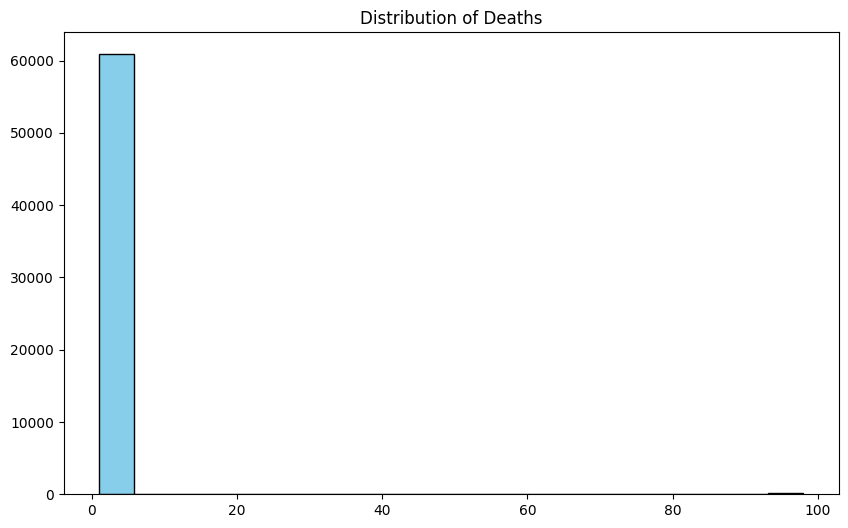

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['ASTHMA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Deaths')

In [11]:
df_dummy = pd.get_dummies(df_cleaned, drop_first=True)
df_dummy

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,DATE_DIED_30/08/2020,DATE_DIED_30/10/2020,DATE_DIED_30/12/2020,DATE_DIED_31/01/2020,DATE_DIED_31/01/2021,DATE_DIED_31/03/2020,DATE_DIED_31/05/2020,DATE_DIED_31/07/2020,DATE_DIED_31/08/2020,DATE_DIED_9999-99-99
0,2,1,1,1,97,1,65,2,2,2,...,False,False,False,False,False,False,False,False,False,False
1,2,1,2,1,97,1,72,97,2,2,...,False,False,False,False,False,False,False,False,False,False
2,2,1,2,2,1,2,55,97,1,2,...,False,False,False,False,False,False,False,False,False,False
3,2,1,1,1,97,2,53,2,2,2,...,False,False,False,False,False,False,False,False,False,False
4,2,1,2,1,97,2,68,97,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115200,2,4,2,2,2,2,53,97,2,2,...,False,False,False,False,False,False,False,False,False,True
115208,1,4,1,1,97,1,47,2,1,2,...,False,False,False,False,False,False,False,False,False,True
115215,2,4,1,2,2,2,66,2,2,1,...,False,False,False,False,False,False,False,False,False,True
115217,1,4,2,2,2,2,65,97,1,2,...,False,False,False,False,False,False,False,False,False,True


In [12]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
df_encode = encode.fit_transform(df_cleaned.select_dtypes(float)).toarray()
print(df_encode)

[[0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [13]:
bool_columns = df_dummy.select_dtypes(bool).columns
df_dummy[bool_columns] = df_dummy[bool_columns].astype(int)
df_dummy

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,DATE_DIED_30/08/2020,DATE_DIED_30/10/2020,DATE_DIED_30/12/2020,DATE_DIED_31/01/2020,DATE_DIED_31/01/2021,DATE_DIED_31/03/2020,DATE_DIED_31/05/2020,DATE_DIED_31/07/2020,DATE_DIED_31/08/2020,DATE_DIED_9999-99-99
0,2,1,1,1,97,1,65,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,1,97,1,72,97,2,2,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,2,1,2,55,97,1,2,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,97,2,53,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1,97,2,68,97,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115200,2,4,2,2,2,2,53,97,2,2,...,0,0,0,0,0,0,0,0,0,1
115208,1,4,1,1,97,1,47,2,1,2,...,0,0,0,0,0,0,0,0,0,1
115215,2,4,1,2,2,2,66,2,2,1,...,0,0,0,0,0,0,0,0,0,1
115217,1,4,2,2,2,2,65,97,1,2,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
X = df_dummy.drop('ASTHMA', axis=1)
y = df_dummy['ASTHMA']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("*"*40)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("*"*40)

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.9605079885292913
****************************************
Confusion Matrix:
 [[    0   472     1]
 [    0 11697     4]
 [    0     5    26]]
****************************************
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       473
           2       0.96      1.00      0.98     11701
          98       0.84      0.84      0.84        31

    accuracy                           0.96     12205
   macro avg       0.60      0.61      0.61     12205
weighted avg       0.92      0.96      0.94     12205



In [20]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train = label_encoder.fit_transform(y_train)

# Transform y_test
y_test = label_encoder.transform(y_test)

print("Transformed y_train unique values:", np.unique(y_train))
print("Transformed y_test unique values:", np.unique(y_test))

Transformed y_train unique values: [0 1 2]
Transformed y_test unique values: [0 1 2]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

print("\n--- Summary of Results ---")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.4f}")


--- Training Decision Tree ---
Accuracy: 0.9120
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.06      0.05       473
           1       0.96      0.95      0.95     11701
           2       0.79      0.97      0.87        31

    accuracy                           0.91     12205
   macro avg       0.60      0.66      0.62     12205
weighted avg       0.93      0.91      0.92     12205

Confusion Matrix:
[[   27   444     2]
 [  621 11074     6]
 [    0     1    30]]

--- Training Random Forest ---
Accuracy: 0.9448
Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.01      0.01       473
           1       0.96      0.98      0.97     11701
           2       0.97      0.97      0.97        31

    accuracy                           0.94     12205
   macro avg       0.65      0.65      0.65     12205
weighted avg       0.92      0.94      0.93     12205

Confusion Ma

In [24]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_p = df_dummy.drop(['ASTHMA'],axis=1)
y_p = df_dummy['ASTHMA']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_p,y_p,random_state= 42,test_size=0.2)

per = Perceptron(random_state=42)
per.fit(X_train_a,y_train_a)

y_pred = per.predict(X_test_a)

accuracy = accuracy_score(y_test_a, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9589


In [25]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [26]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [27]:
tf.keras.backend.clear_session()

num_classes = y_train_cat.shape[1]
model_dl = Sequential([
    Dense(16,input_dim=X_train.shape[1],activation='relu'),
    Dense(8,activation='leaky_relu'),
    Dense(num_classes,activation='softmax')
])

In [28]:
model_dl.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [29]:
history = model_dl.fit(X_train,y_train_cat,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8563 - loss: 0.8282 - val_accuracy: 0.9622 - val_loss: 0.1504
Epoch 2/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9595 - loss: 0.1663 - val_accuracy: 0.9623 - val_loss: 0.1478
Epoch 3/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9587 - loss: 0.1621 - val_accuracy: 0.9623 - val_loss: 0.1467
Epoch 4/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9593 - loss: 0.1617 - val_accuracy: 0.9622 - val_loss: 0.1459
Epoch 5/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9592 - loss: 0.1577 - val_accuracy: 0.9623 - val_loss: 0.1489
Epoch 6/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9590 - loss: 0.1596 - val_accuracy: 0.9623 - val_loss: 0.1472
Epoch 7/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9593 - loss: 0.1560 - val_accuracy: 0.9623 - val_loss: 0.1515
Epoch 8/100
1221/1221 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9576 - loss: 0

In [30]:

loss,accuracy = model_dl.evaluate(X_test,y_test_cat,verbose=1)
print("Accuracy","-"*20,'>',accuracy)


382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9597 - loss: 0.1884
Accuracy -------------------- > 0.9600983262062073


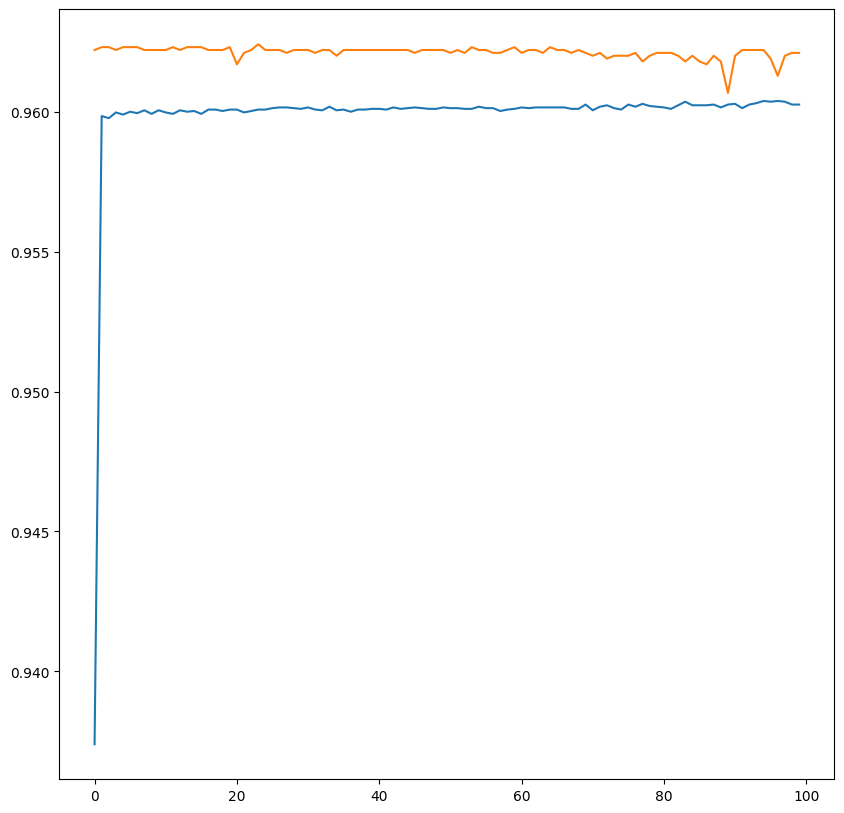

In [31]:

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='train Acc')
plt.plot(history.history['val_accuracy'],label='val Acc')